<a href="https://colab.research.google.com/github/divyakedia/OIBSIP/blob/main/Task_1_Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNEMPLOYMENT ANALYSIS WITH PYTHON**


Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so in this project we will be analyzing the unemployment rate.



1. Importing Libraries

In [73]:
# importing necessary libraries
# for numerical operations:
import pandas as pd
import numpy as np
# for date:
import datetime
# for visualization:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px


2. Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load Dataset
data_set1 = pd.read_csv('/content/drive/MyDrive/Unemployment in India.csv')
data_set2 = pd.read_csv('/content/drive/MyDrive/Unemployment_Rate_upto_11_2020.csv')

3. Dataset 1 : Unemployment Rates in India

In [4]:
data_set1.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
data_set1.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_set1.shape

(768, 7)

In [12]:
data_set1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
data_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
data_set1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [25]:
data_set1[[' Estimated Unemployment Rate (%)',
                ' Estimated Employed',
                ' Estimated Labour Participation Rate (%)']].corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


In [26]:
data_set1.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
749,False,False,False,False,False,False,False
750,False,False,False,False,False,False,False
751,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False


In [27]:
data_set1.isnull().sum()


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

4. Data Wrangling:

In [28]:
data_set1.dropna(axis=0,inplace=True)

In [29]:
data_set1.shape

(740, 7)

In [30]:
data_set1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [31]:
data_set1.duplicated().sum()

0

In [32]:
data_set1.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [42]:
data_set1.rename(columns={' Date':'Date',
                         ' Frequency':'Frequency',
                         ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                        ' Estimated Employed':'Estimated Employed',
                        ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'},inplace=True)

In [43]:
data_set1.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [49]:
data_set1["Date"] = pd.to_datetime(data_set1["Date"])
data_set1['Day'] = data_set1['Date'].dt.day
data_set1['Month'] = data_set1['Date'].dt.month_name()
data_set1['Year'] = data_set1['Date'].dt.year

In [50]:
data_set1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,Day
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,May,2019,31
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,June,2019,30
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,July,2019,31
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,August,2019,31
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,September,2019,30


5. Visualization

1. Area

In [51]:
data_set1['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

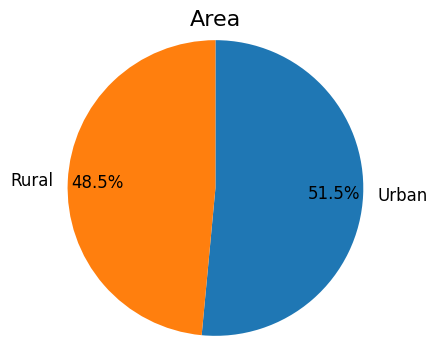

In [82]:
#Pie chart for Area
Area =data_set1["Area"].value_counts()
plt.figure(figsize=(4,4))
plt.pie(Area, labels=Area.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1,
        radius=1.2, startangle=90,
        textprops=dict(color="black", fontsize=12), counterclock=False)
plt.title('Area', fontsize=16)
plt.show()

2. Region

In [54]:
data_set1['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

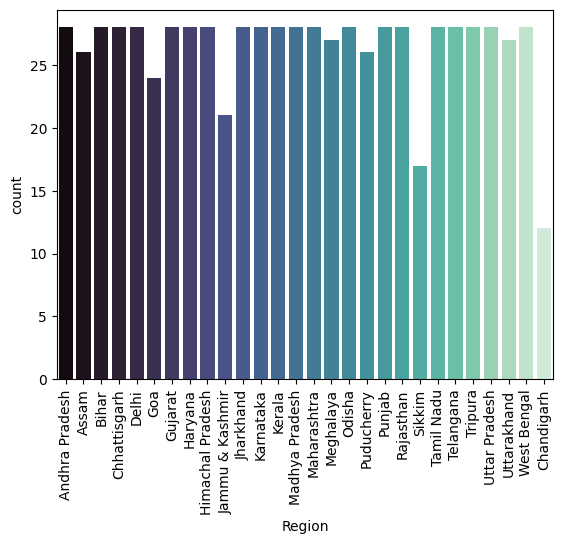

In [57]:
sns.countplot(x=data_set1['Region'],palette="mako")
plt.xticks(rotation=90)
plt.show()

3. Year

In [62]:
data_set1['Year'].value_counts()

2019    430
2020    310
Name: Year, dtype: int64

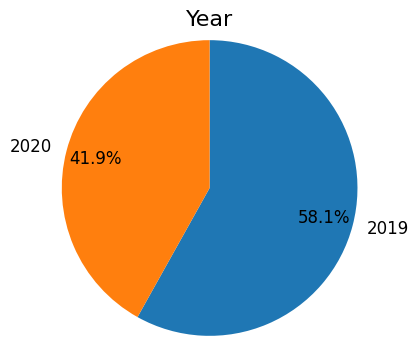

In [83]:
Year =data_set1["Year"].value_counts()
plt.figure(figsize=(4,4))
plt.pie(Year, labels=Year.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1,
        radius=1.2, startangle=90,
        textprops=dict(color="black", fontsize=12), counterclock=False)
plt.title('Year', fontsize=16)
plt.show()

4. Month

In [59]:
data_set1['Month'].value_counts()

May          105
June         104
October       55
November      55
July          54
August        53
December      53
January       53
February      53
September     52
March         52
April         51
Name: Month, dtype: int64

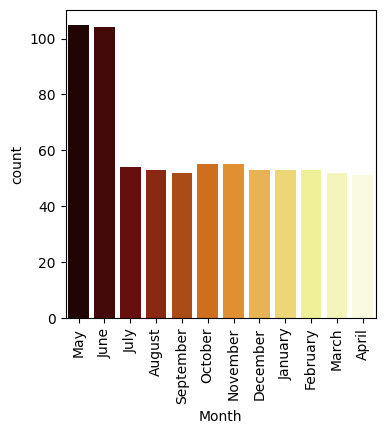

In [64]:
plt.figure(figsize = (4, 4))
sns.countplot(x=data_set1['Month'],palette = "afmhot")
plt.xticks(rotation='vertical')
plt.show()

5. Day

In [65]:

data_set1['Day'].value_counts()

31    425
30    262
29     53
Name: Day, dtype: int64

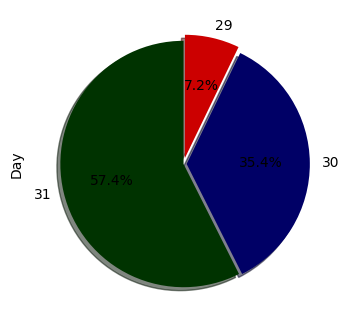

In [84]:
data_set1['Day'].value_counts().plot(kind='pie',
                              figsize=(8,4),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=["31","30","29"],
                               colors=['#003300','#000066',"#cc0000"],
                               explode=[0,0.025,0.05]);

6. Heatmap

<ipython-input-72-c9ef08faffbf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data_set1.corr()


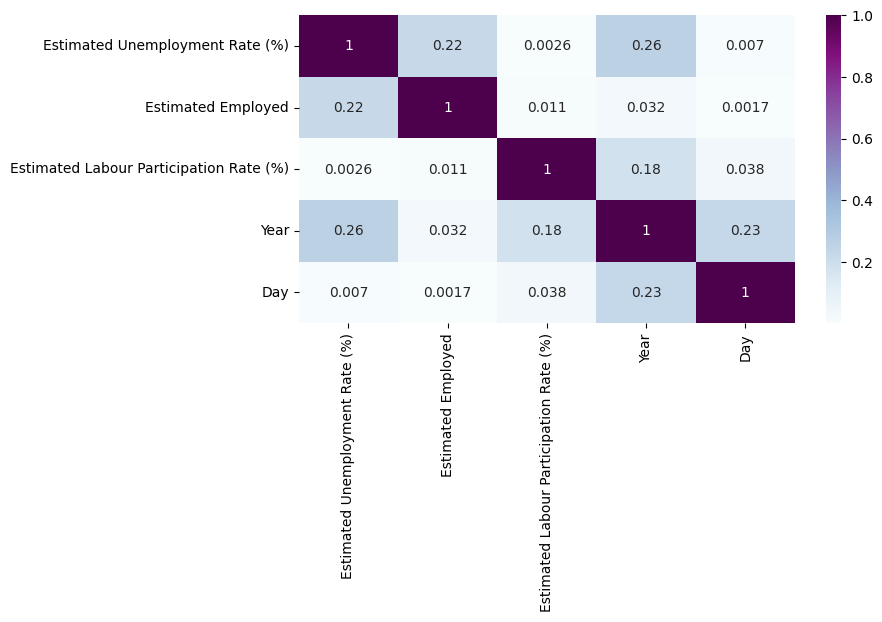

In [72]:
plt.figure(figsize=(8,4))
corr=data_set1.corr()
sns.heatmap(data=abs(corr),annot=True,cmap="BuPu");

7.ScatterPlot

In [78]:
scatter = px.scatter(data_set1,x='Region',y='Estimated Unemployment Rate (%)',color='Region',
                title='Unemployment Rate (Statewise) by Scatter Plot',template='plotly')
scatter.update_layout(xaxis={'categoryorder':'total descending'})
scatter.show()

8. Histogram

In [81]:
histo = px.histogram(data_set1,x='Region',y='Estimated Unemployment Rate (%)',color='Region',
                  title='Unemploymeny Rate (Statewise) by Histogram',template='plotly')
histo.update_layout(xaxis={'categoryorder':'total descending'})
histo.show()

9. PairPlot

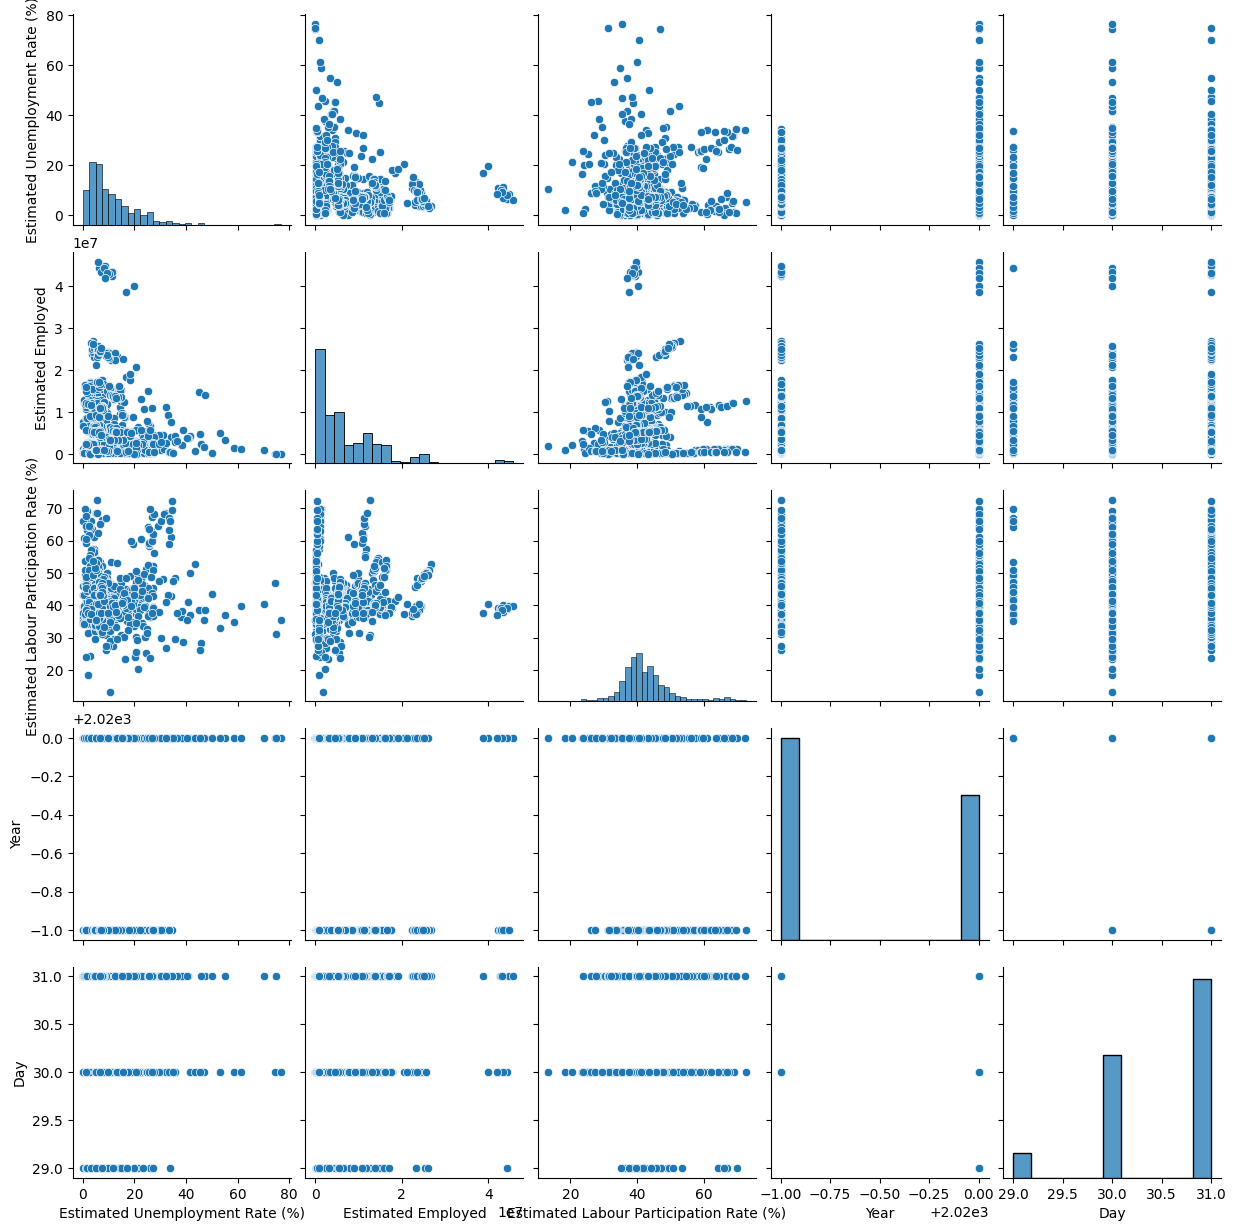

In [89]:
sns.pairplot(data_set1)
plt.show()

Dataset 2 : Unemployment Rates in India upto 2020

In [85]:
data_set2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [86]:
data_set2.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [87]:
data_set2.shape

(267, 9)

In [88]:
data_set2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [90]:
data_set2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [92]:
data_set2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [93]:
data_set2[[' Estimated Unemployment Rate (%)',
                ' Estimated Employed',
                ' Estimated Labour Participation Rate (%)']].corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.245176,-0.073540
Estimated Employed,-0.245176,1.000000,-0.047948
Estimated Labour Participation Rate (%),-0.073540,-0.047948,1.000000


In [94]:
data_set2.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
262,False,False,False,False,False,False,False,False,False
263,False,False,False,False,False,False,False,False,False
264,False,False,False,False,False,False,False,False,False
265,False,False,False,False,False,False,False,False,False


In [95]:
data_set2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

Data Wrangling:

In [96]:
data_set2.dropna(axis=0,inplace=True)

In [97]:
data_set2.shape

(267, 9)

In [98]:
data_set2.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [99]:
data_set2.duplicated().sum()

0

In [100]:
data_set2.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                           int64
 Estimated Labour Participation Rate (%)    float64
Region.1                                     object
longitude                                   float64
latitude                                    float64
dtype: object

In [101]:
data_set2.rename(columns={' Date':'Date',
                         ' Frequency':'Frequency',
                         ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                        ' Estimated Employed':'Estimated Employed',
                        ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'},inplace=True)

In [102]:
data_set2.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [114]:
data_set2["Date"] = pd.to_datetime(data_set2["Date"])
data_set2['Day'] = data_set2['Date'].dt.day
data_set2['Month'] = data_set2['Date'].dt.month_name()
data_set2['Year'] = data_set2['Date'].dt.year

In [115]:
data_set2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Day,Month,Year
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,31,January,2020
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,29,February,2020
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,31,March,2020
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,30,April,2020
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,31,May,2020


Visualization

Region

In [116]:
data_set2['Region'].value_counts()

Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: Region, dtype: int64

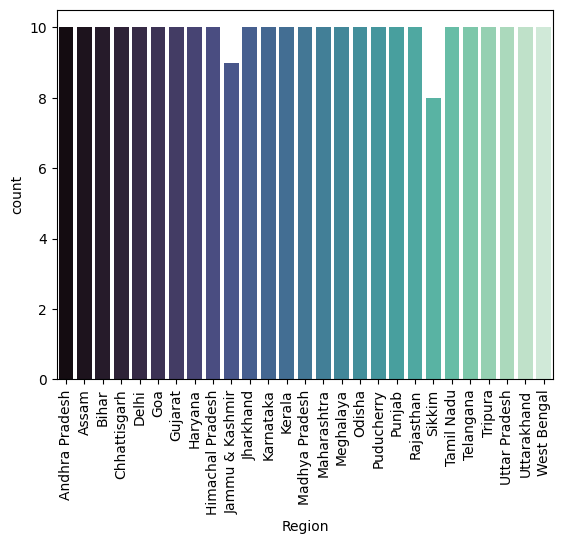

In [117]:
sns.countplot(x=data_set2['Region'],palette="mako")
plt.xticks(rotation=90)
plt.show()

Year

In [118]:
data_set2['Year'].value_counts()

2020    267
Name: Year, dtype: int64

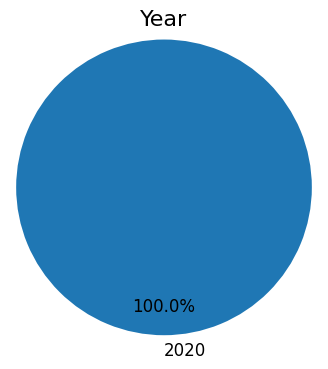

In [119]:
Year =data_set2["Year"].value_counts()
plt.figure(figsize=(4,4))
plt.pie(Year, labels=Year.index, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1,
        radius=1.2, startangle=90,
        textprops=dict(color="black", fontsize=12), counterclock=False)
plt.title('Year', fontsize=16)
plt.show()

Month

In [120]:
data_set2['Month'].value_counts()

March        27
May          27
June         27
July         27
August       27
September    27
October      27
January      26
February     26
April        26
Name: Month, dtype: int64

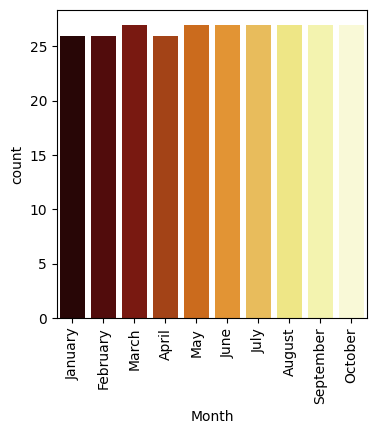

In [121]:
plt.figure(figsize = (4, 4))
sns.countplot(x=data_set2['Month'],palette = "afmhot")
plt.xticks(rotation='vertical')
plt.show()

Day

In [122]:
data_set2['Day'].value_counts()

31    161
30     80
29     26
Name: Day, dtype: int64

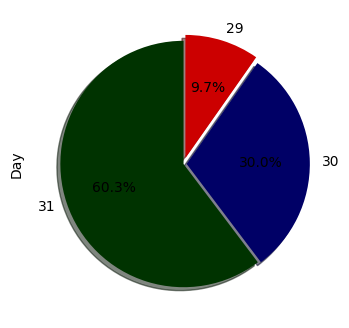

In [123]:
data_set2['Day'].value_counts().plot(kind='pie',
                              figsize=(8,4),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=["31","30","29"],
                               colors=['#003300','#000066',"#cc0000"],
                               explode=[0,0.025,0.05]);

Heatmap

<ipython-input-124-6e5f02919669>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



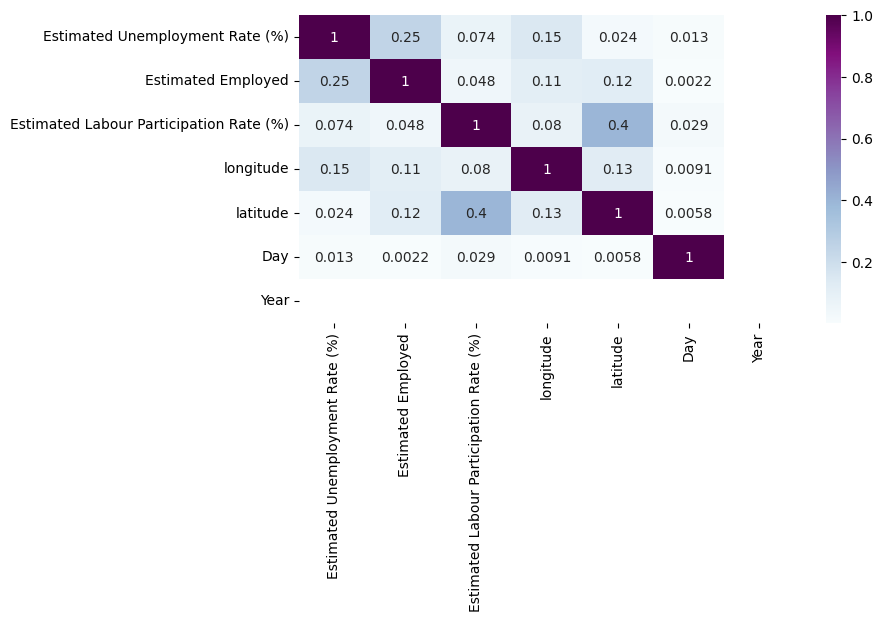

In [124]:
plt.figure(figsize=(8,4))
corr=data_set2.corr()
sns.heatmap(data=abs(corr),annot=True,cmap="BuPu");

Pairplot

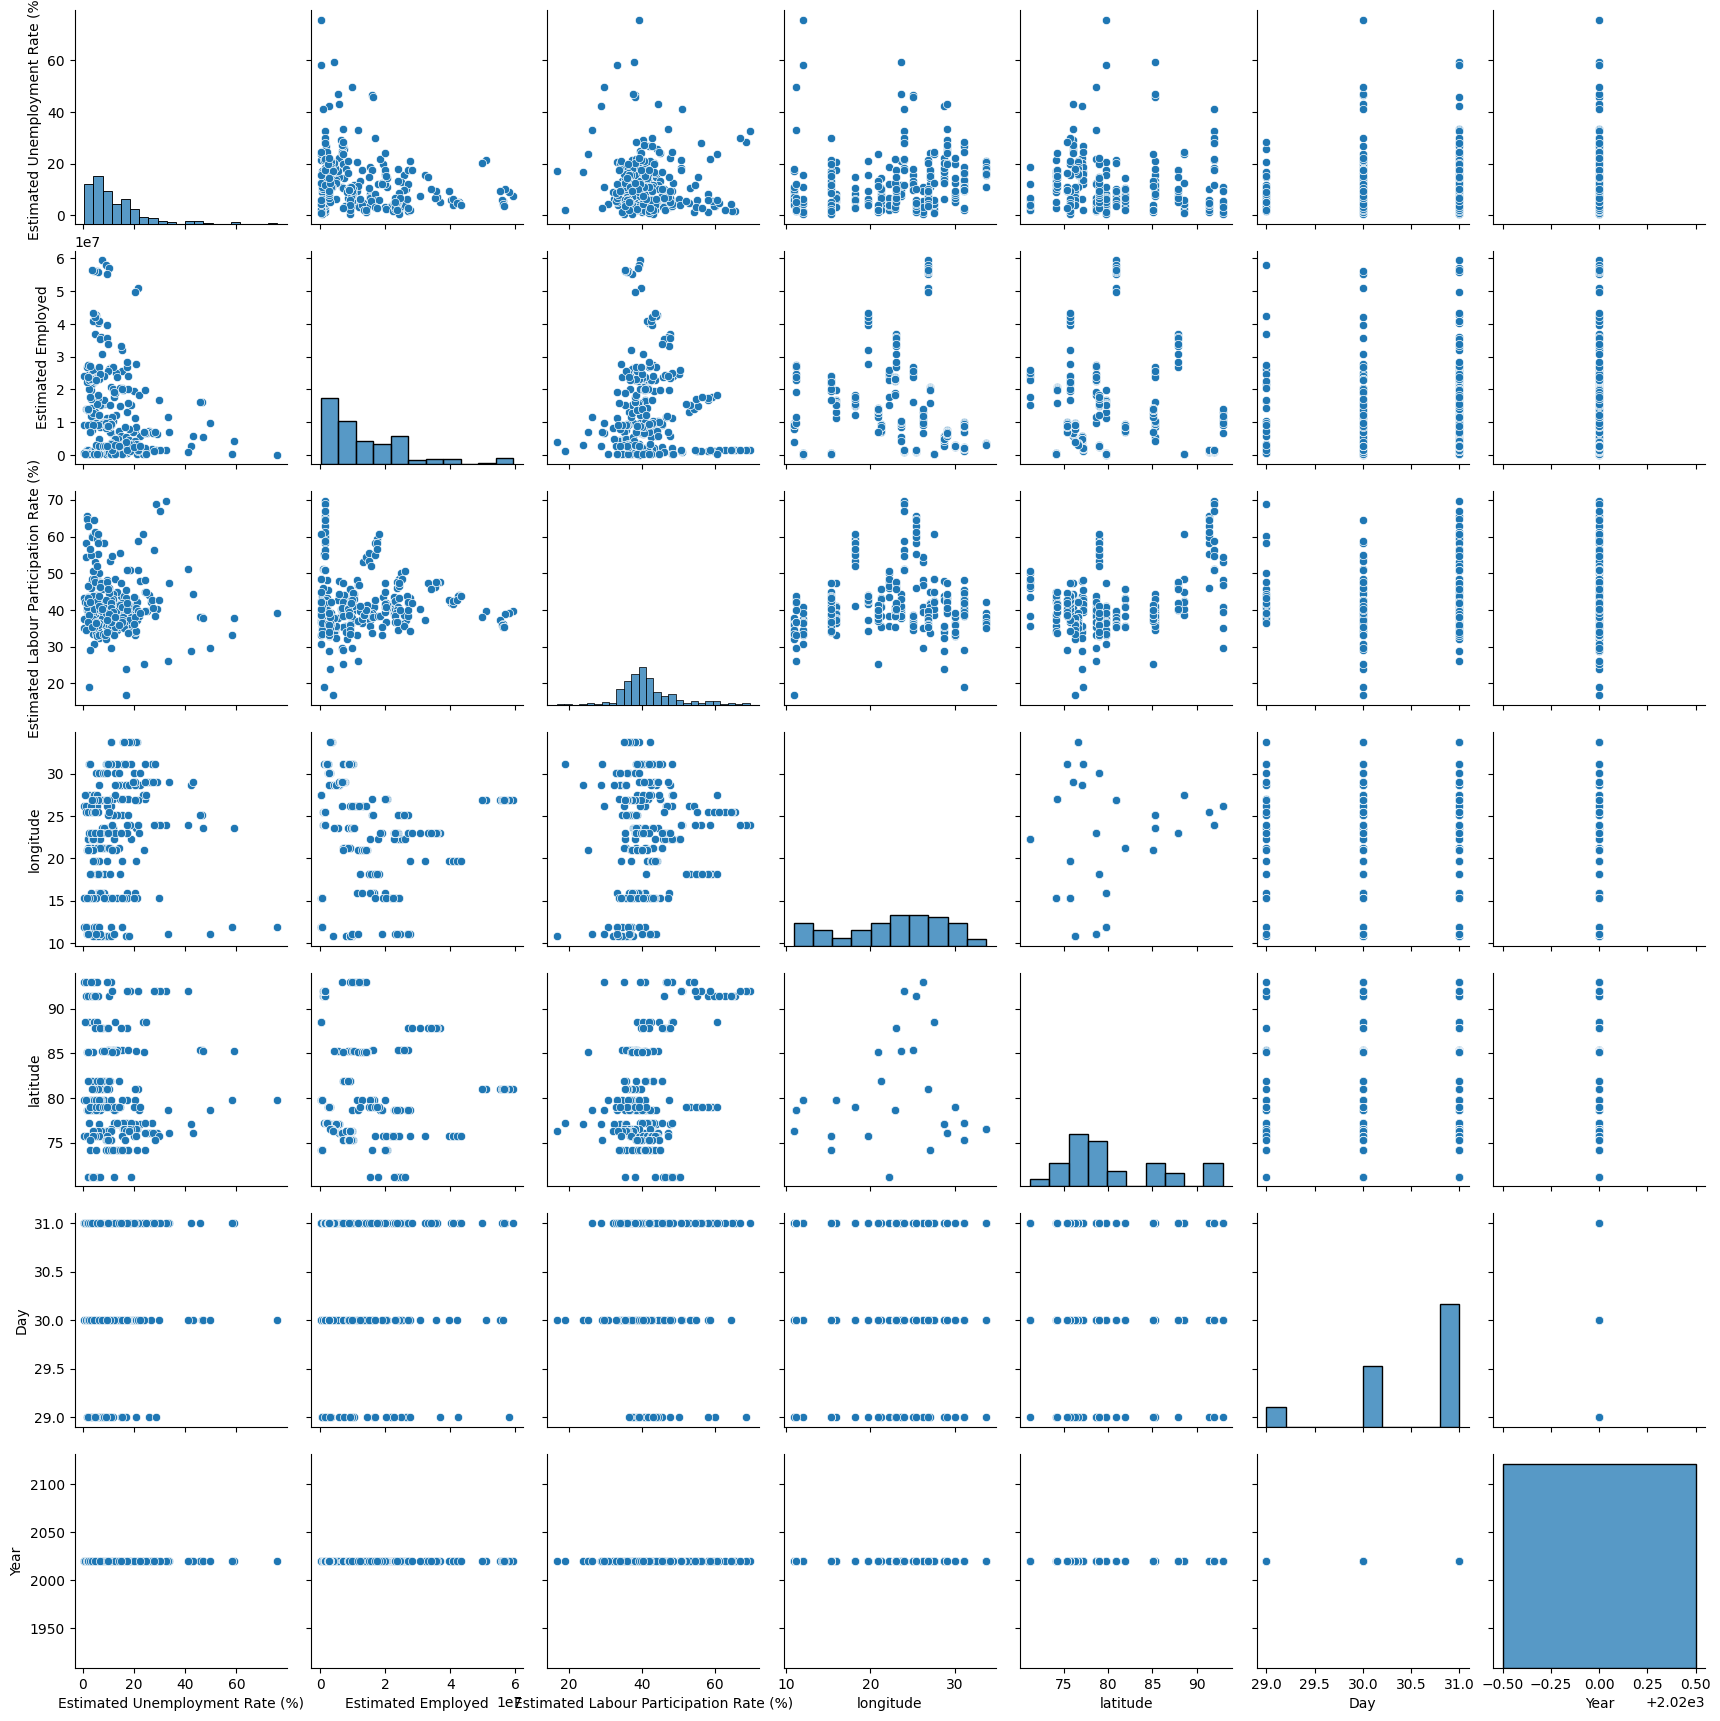

In [125]:
sns.pairplot(data_set2)
plt.show()

Conclusion:

1. Unemployments in Rural and Urban area areas are almost same but a slight more in Urban Areas.

2. The Unemployment in chandigarh is least followed by Rajasthan,Jammu & Kashmir and Goa.

3. Maximum Unemployment is in the month of May and June.

4. Maximum people lose their job on the day 31 i.e last day of the month.